In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, r2_score, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report 
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

In [2]:
file = ('diabetes_prediction_dataset.csv')
df= pd.read_csv(file)
print(df.shape)
df.head(2)

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0


In [3]:
numerical_cols = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_cols = ['gender', 'smoking_history']

In [4]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
X = df.iloc[:,0:-1]
y = df[['diabetes']]

## Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 8), (20000, 8), (80000, 1), (20000, 1))

## Create Detailed Pipeline

### Imputing Numerical Columns

In [8]:
numerical_transformer = SimpleImputer(strategy='median')

### Imputing and Encoding Categorical Type Columns

In [9]:
categorical_transformer = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')),
           ('encode', OrdinalEncoder())
           ]
    )

### Bundle preprocessing for numerical and categorical data

In [10]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
        ]
    )

## Define Model-1

In [11]:
model1 = KNeighborsClassifier()

### Bundle preprocessing and modeling code in a pipeline

In [12]:
pipeline1 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', model1)
        ]
    )

In [13]:
grid_params = {}

grid1 = GridSearchCV(pipeline1, param_grid=grid_params, cv=3, n_jobs=1, verbose=2, scoring=None)

In [14]:
grid1.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   0.9s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'bmi',
                                                                          'HbA1c_level',
                                                                          'blood_glucose_level']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OrdinalEncoder())]),
                                                                         ['gender',
                                                                          'smoking_history'])])),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=1, param_grid={}, verbose=2)

### Model-1 Metrics

KNN Classifier Metrics


Accuracy score = 0.9525


              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.87      0.52      0.65      1708

    accuracy                           0.95     20000
   macro avg       0.91      0.76      0.81     20000
weighted avg       0.95      0.95      0.95     20000



ROC_AUC_Score = 0.8736491900069188


Text(50.722222222222214, 0.5, 'True')

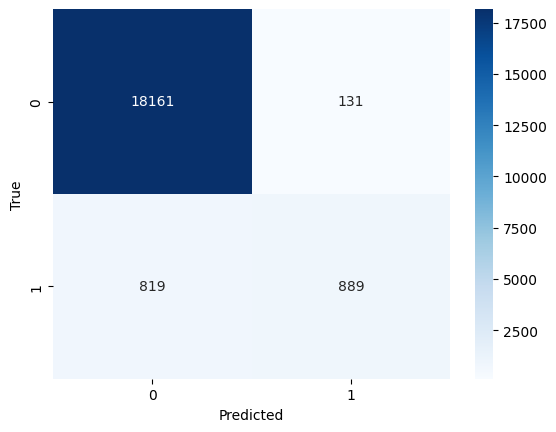

In [15]:
print('KNN Classifier Metrics')
pred1 = grid1.predict(X_test)

print('\n')
acc1 = accuracy_score(y_test, pred1)
print(f"Accuracy score = {acc1}")
print('\n')
print(classification_report(y_test, pred1))

pred_proba1 = grid1.predict_proba(X_test)
print('\n')

roc1 = roc_auc_score(y_test, pred_proba1[:,1])
print(f"ROC_AUC_Score = {roc1}")

cm1 = confusion_matrix(y_test, pred1 )

sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

## Define Model-2

In [16]:
model2 = DecisionTreeClassifier()

### Bundle preprocessing and modeling code in a pipeline

In [17]:
pipeline2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', model2)
        ]
    )

In [18]:
grid_params = {}

grid2 = GridSearchCV(pipeline2, param_grid=grid_params, cv=3, n_jobs=1, verbose=2, scoring=None)

In [19]:
grid2.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'bmi',
                                                                          'HbA1c_level',
                                                                          'blood_glucose_level']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OrdinalEncoder())]),
                                                                         ['gender',
                                                                          'smoking_history'])])),
                                       ('model', DecisionTreeClassifier())]),
             n_jobs=1, param_grid={}, verbose=2)

### Model-2 Metrics

Decesion Tree Metrics


Accuracy score = 0.95275


              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.72      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000



ROC_AUC_Score = 0.8561536672076351


Text(50.722222222222214, 0.5, 'True')

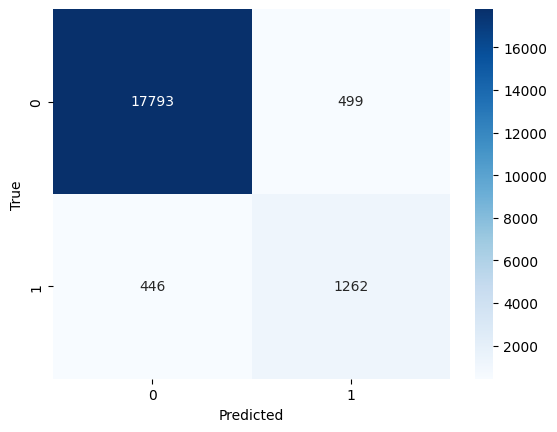

In [20]:
print('Decesion Tree Metrics')
pred2 = grid2.predict(X_test)

print('\n')
acc2 = accuracy_score(y_test, pred2)
print(f"Accuracy score = {acc2}")
print('\n')
print(classification_report(y_test, pred2))

pred_proba2 = grid2.predict_proba(X_test)
print('\n')

roc2 = roc_auc_score(y_test, pred_proba2[:,1])
print(f"ROC_AUC_Score = {roc2}")

cm2 = confusion_matrix(y_test, pred2)

sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

## Define Model-3

In [21]:
model3 = XGBClassifier()

### Bundle preprocessing and modeling code in a pipeline

In [22]:
pipeline3 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', model3)
        ]
    )

In [23]:
grid_params = {}

grid3 = GridSearchCV(pipeline3, param_grid=grid_params, cv=3, n_jobs=1, verbose=2, scoring=None)

In [24]:
grid3.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['age',
                                                                          'hypertension',
                                                                          'heart_disease',
                                                                          'bmi',
                                                                          'HbA1c_level',
                                                                          'blood_glucose_level']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OrdinalEncoder())]),
                                                                         ['gender',
                                                                          'smoking_history'])])...
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=1, param_grid={}, verbose=2)

### Model-3 Metrics

Decesion Tree Metrics


Accuracy score = 0.9714


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.96      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000



ROC_AUC_Score = 0.8561536672076351


Text(50.722222222222214, 0.5, 'True')

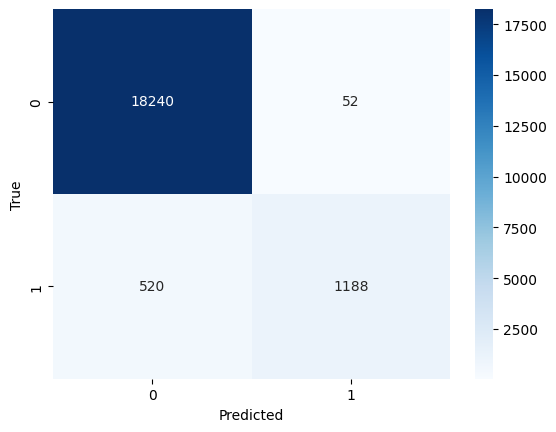

In [25]:
print('Decesion Tree Metrics')
pred3 = grid3.predict(X_test)

print('\n')
acc3 = accuracy_score(y_test, pred3)
print(f"Accuracy score = {acc3}")
print('\n')
print(classification_report(y_test, pred3))

pred_proba3 = grid3.predict_proba(X_test)
print('\n')

roc3 = roc_auc_score(y_test, pred_proba2[:,1])
print(f"ROC_AUC_Score = {roc3}")

cm3 = confusion_matrix(y_test, pred3)

sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

## Save Best Model

In [26]:
import pickle
filename = 'diabetes_xgb_model.sav'
pickle.dump(grid3, open(filename, 'wb'))

## Load Model and Predict

In [27]:
filename = 'diabetes_xgb_model.sav'
model = pickle.load(open(filename, 'rb'))

In [28]:
data = pd.read_excel('new_data_diabeties.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'new_data_diabeties.xlsx'

In [29]:
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,30,1,0,current,30,7.1,180,1


In [30]:
data.iloc[:,0:-1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,30,1,0,current,30,7.1,180


In [32]:
class_names = ['No-Diabetes', 'Diabetes']
output = model.predict(data.iloc[:,0:-1])
result = class_names[output[0]]
result

'Diabetes'